In [319]:
# Load the data required
import numpy as np
import pandas as pd
data = pd.read_csv('hospdat.csv')
# check if data is a data frame
isinstance(data, pd.DataFrame)
data.head()

,Unnamed: 0,ID,Age,Sex,Weight,Heart_rhythm,GROUP,rct,hct,creatini,...,followup,fe2,dvg2,paps2,im2,Death2,Redo,INFO,Cause_of_redo,Age_group
0,1,160132,2.5,F,11.0,NHIP XOANG,NONE,65,35.0,38.0,...,26,62,42,30,1.5,alive,NO,Not specified,NONE,0-4 yrs
1,2,171109,0.5,F,5.0,NHIP XOANG,NONE,50,37.0,35.0,...,31,61,41,25,2.0,alive,NO,Not specified,NONE,0-4 yrs
2,3,990312,6.0,F,18.0,NHIP XOANG,BAND,55,40.0,30.0,...,242,67,41,30,3.5,alive,YES,IM REDUX,MR,5-9 yrs
3,4,990676,10.0,F,20.0,NHIP XOANG,RING,62,38.0,38.0,...,240,70,38,25,2.0,alive,NO,Not specified,NONE,10-14 yrs
4,5,981121,17.0,M,45.0,NHIP XOANG,RING,55,40.0,65.0,...,228,63,49,30,2.0,alive,NO,Not specified,NONE,15-18 yrs


In [315]:
# extract column names
data.columns
# obtain column types
data.dtypes

ID                     int64
Sex                   object
Weight               float64
Heart_rhythm          object
Type_of_implant       object
rct                    int64
hct                  float64
creatini             float64
dvg1                   int64
fe1                    int64
paps1                  int64
am1                    int64
imtype1               object
GRADMIT1             float64
GRADMIT2             float64
Oper_date             object
imtype2               object
bandelet              object
Ring_Group            object
tcec                   int64
tclampag               int64
cpg                    int64
ticu                   int64
tventil                int64
thospit                int64
Heart_failure         object
arhythmias             int64
pericaeffusion        object
Kidney_failure        object
Death                 object
infection              int64
Last_followup         object
followup               int64
fe2                    int64
dvg2          

In [320]:
# delete columns 'Unnamed: 0', 'INFO' and 'Age'
data.drop(['Unnamed: 0', 'INFO', 'Age', 'ID', 'Last_followup'], axis=1, inplace=True)
# rename the outcome feature, 'Cause_of_redo' to 'Type_of_condition' and 'GROUP' to 'Type_of_implant'
data = data.rename(columns={'Cause_of_redo': 'Type_of_condition', 'GROUP':'Type_of_implant'})

Index(['ID', 'Age', 'Sex', 'Weight', 'Heart_rhythm', 'GROUP', 'rct', 'hct',
       'creatini', 'dvg1', 'fe1', 'paps1', 'am1', 'imtype1', 'GRADMIT1',
       'GRADMIT2', 'Oper_date', 'imtype2', 'bandelet', 'Ring_Group', 'tcec',
       'tclampag', 'cpg', 'ticu', 'tventil', 'thospit', 'Heart_failure',
       'arhythmias', 'pericaeffusion', 'Kidney_failure', 'Death', 'infection',
       'Last_followup', 'followup', 'fe2', 'dvg2', 'paps2', 'im2', 'Death2',
       'Redo', 'Cause_of_redo', 'Age_group'],
      dtype='object')

In [321]:
# doesn't work
#data.replace(to_replace={'Heart_rhymth': {'NHIP XOANG': 'Sinus arrhythmia', 'RUNG NHI': 'Atrial fibrillation'}},
 #          inplace=True, regex=True)

# works
data.replace(to_replace=['NHIP XOANG', 'RUNG NHI'],
           value=['Sinus arrhythmia', 'Atrial fibrillation'], 
           inplace=True)
data.head()

,Sex,Weight,Heart_rhythm,Type_of_implant,rct,hct,creatini,dvg1,fe1,paps1,...,infection,followup,fe2,dvg2,paps2,im2,Death2,Redo,Type_of_condition,Age_group
0,F,11.0,Sinus arrhythmia,NONE,65,35.0,38.0,55,57,60,...,0,26,62,42,30,1.5,alive,NO,NONE,0-4 yrs
1,F,5.0,Sinus arrhythmia,NONE,50,37.0,35.0,39,65,55,...,0,31,61,41,25,2.0,alive,NO,NONE,0-4 yrs
2,F,18.0,Sinus arrhythmia,BAND,55,40.0,30.0,58,68,75,...,0,242,67,41,30,3.5,alive,YES,MR,5-9 yrs
3,F,20.0,Sinus arrhythmia,RING,62,38.0,38.0,63,62,55,...,0,240,70,38,25,2.0,alive,NO,NONE,10-14 yrs
4,M,45.0,Sinus arrhythmia,RING,55,40.0,65.0,69,73,35,...,0,228,63,49,30,2.0,alive,NO,NONE,15-18 yrs


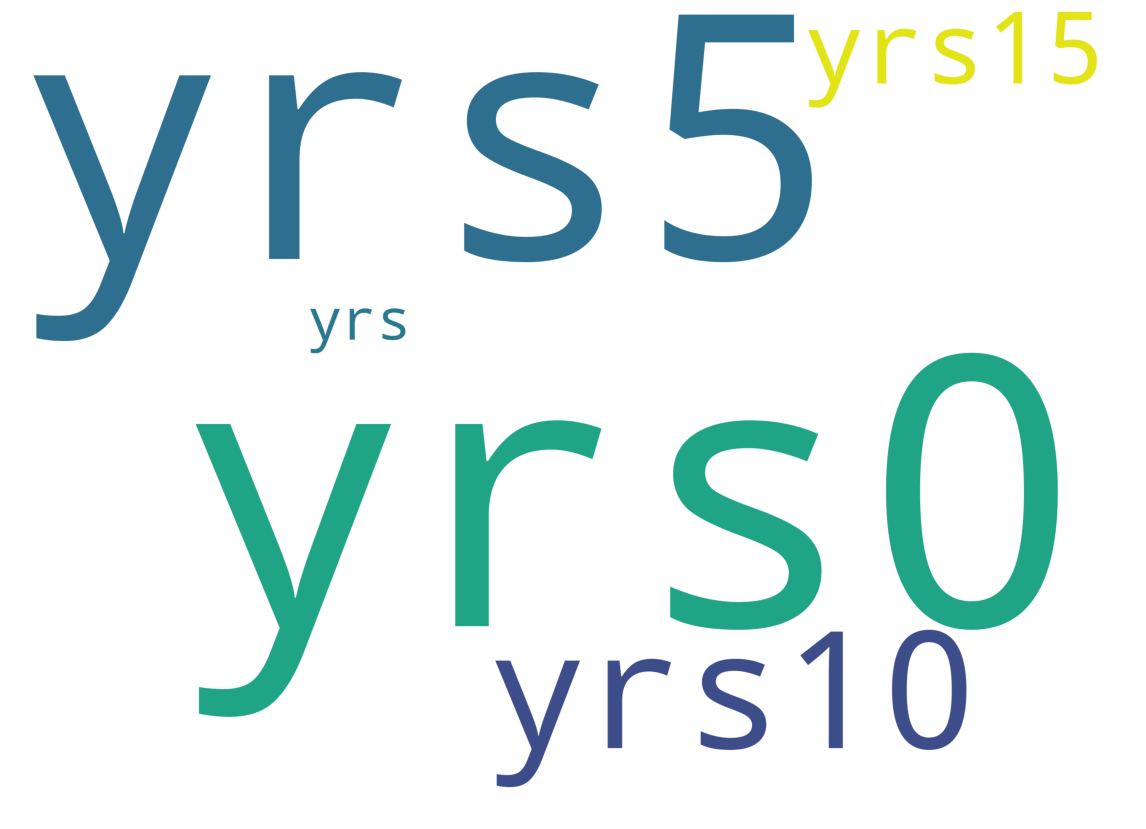

In [53]:
# Word cloud for the Age_group distribution
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (30,15))
Age_dist = data.Age_group
Age_cloud = WordCloud(stopwords=STOPWORDS,
                     background_color='white',
                     collocations=False,
                     width=2500, 
                     height=1800).generate("".join(Age_dist))
plt.axis('off')
plt.imshow(Age_cloud)

In [173]:
# Random Forest module
from sklearn.ensemble import RandomForestClassifier
# training and test data module
from sklearn.model_selection import train_test_split
# ROC-AUC module
from dython.model_utils import roc_graph

from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [183]:
np.random.seed(1237)
# predictors 
X = data[['Age_group', 'Type_of_implant']]
# outcome 
#data["Type_of_condition"] = data["Type_of_condition"].astype('category')
y = data["Type_of_condition"]
y = label_binarize(y, classes=[0,1,2])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# label encode the categorical columns and convert them to numbers 
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

#le = LabelEncoder()
#y_train = le.fit_transform(y_train.astype(str))
#y_test = le.fit_transform(y_test.astype(str))


#y_test['Type_of_condition'] = le.transform(y_test['Type_of_condition'].astype(str))

# fit the model using the training set and make predictions using the test set
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0))
#classifier = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0)
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

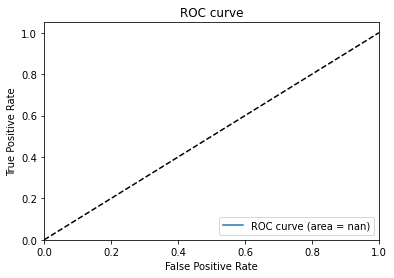

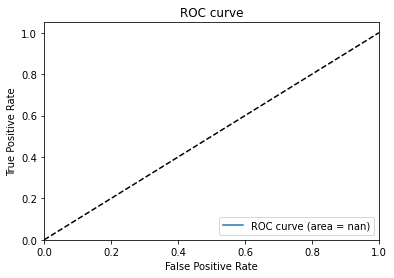

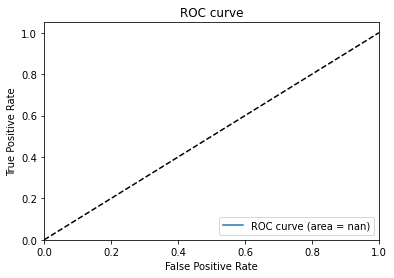

In [178]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

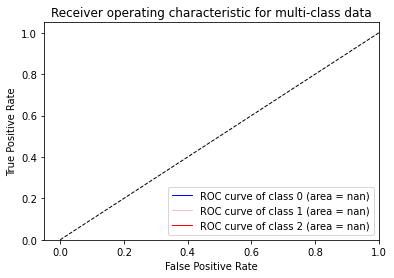

In [191]:
import itertools
# on the same plot
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'pink', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [198]:
# confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred,
                            labels=[0, 1, 2])

# calculate the number of correct predictions
s = 0
for i in range(y_test.shape[0]):
    if y_pred[i,2] >= .53: cls = 2
    elif y_pred[i,0] >= .46: cls = 0
    elif y_pred[i,1] >= .27: cls = 1
    else: cls = y_pred[i,:].argmax() # fallback
    if y_test[i,:].argmax() == cls:
        s += 1
print('Correct predictions: {0}/{1} ({2:.2f}%)'.format(s, y_test.size, 100.0*s/y_test.size))

Correct predictions: 24/72 (33.33%)


Class=2, n=95 (79.832%)
Class=0, n=8 (6.723%)
Class=1, n=16 (13.445%)


[Text(0, 0, 'NONE'), Text(0, 0, 'MS'), Text(0, 0, 'MR')]

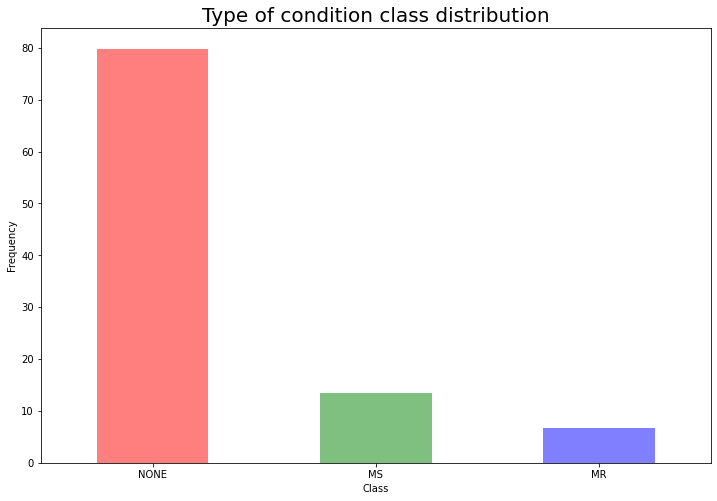

In [247]:
from collections import Counter

Y = LabelEncoder().fit_transform(data["Type_of_condition"])
counter = Counter(Y)

for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# class 2 = 'NONE', class 1 = 'MS', class 0 = 'MR'
frequencies = [79.832, 13.445, 6.723]
freq_series = pd.Series(frequencies)

# Plot the figure
plt.figure(figsize=(12, 8))
my_colors = list('rgbkymc') 
ax = freq_series.plot(kind='bar', alpha=0.5, rot=0,color=my_colors)
ax.set_title('Type of condition class distribution', fontsize=20)
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
x_labels = ["NONE", "MS", "MR"]
ax.set_xticklabels(x_labels)

In [248]:
# Oversample
from imblearn.over_sampling import SMOTE

X = data[['Age_group', 'Type_of_implant']]
X = X.apply(LabelEncoder().fit_transform)

Y = LabelEncoder().fit_transform(data["Type_of_condition"])

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=2, n=95 (33.333%)
Class=0, n=95 (33.333%)
Class=1, n=95 (33.333%)


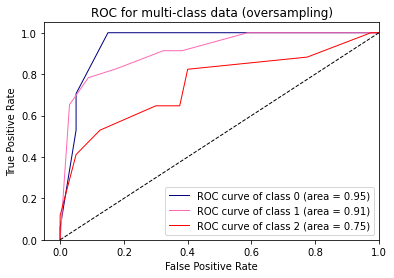

In [251]:
np.random.seed(1237)
Y = label_binarize(Y, classes=[0,1,2])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# fit the model using the training set and make predictions using the test set
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0))
#classifier = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0)
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)


# plot ROC-AUC curve
n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['navy', 'hotpink', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data (oversampling)')
plt.legend(loc="lower right")
plt.show()

In [274]:
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)

CM = confusion_matrix(y_true, y_pred)
CM

array([[12,  0,  5],
       [ 1, 15,  7],
       [ 5,  1, 11]])

Confusion matrix, without normalization
[[12  0  5]
 [ 1 15  7]
 [ 5  1 11]]


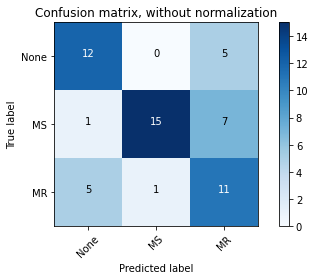

In [275]:
def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=['None', 'MS', 'MR'],
                      title='Confusion matrix, without normalization')

In [280]:
from sklearn.metrics import classification_report
target_names = ['MR', 'MS', 'None']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          MR       0.67      0.71      0.69        17
          MS       0.94      0.65      0.77        23
        None       0.48      0.65      0.55        17

    accuracy                           0.67        57
   macro avg       0.69      0.67      0.67        57
weighted avg       0.72      0.67      0.68        57



In [282]:
# The kappa score (see docstring) is a number between -1 and 1. 
# Scores above .8 are generally considered good agreement; 
# zero or lower means no agreement (practically random labels).

from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_true, y_pred)

0.5041208791208791

In [1]:
Y = label_binarize(Y, classes=[0,1,2])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# fit the model using the training set and make predictions using the test set
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0))
#classifier = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0)
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

s = 0
for i in range(y_test.shape[0]):
    if y_test[i,:].argmax() == y_pred[i,:].argmax():
        s += 1
print('Correct predictions: {0}/{1} ({2:.2f}%)'.format(s, y_test.size, 100.0*s/y_test.size))

roc_graph(y_test, y_pred, class_names = target_names, figsize=(7,7), colors=my_colors)

NameError: name 'label_binarize' is not defined

In [295]:
s = 0
for i in range(y_test.shape[0]):
    if y_pred[i,2] >= .47: cls = 2
    elif y_pred[i,0] >= .44: cls = 0
    elif y_pred[i,1] >= .22: cls = 1
    else: cls = y_pred[i,:].argmax() # fallback
    if y_test[i,:].argmax() == cls:
        s += 1
print('Correct predictions: {0}/{1} ({2:.2f}%)'.format(s, y_test.size, 100.0*s/y_test.size))

Correct predictions: 39/171 (22.81%)


In [314]:
# average importance of Age group and Type of Implant
feat_impts = [] 
for clf in classifier.estimators_:
    feat_impts.append(clf.feature_importances_)

np.mean(feat_impts, axis=0)

array([0.43285975, 0.56714025])